# Example of reading a file with conformation structure

In [1]:
def read_conformation(fname):
    struct_conf = []
    f = open(fname, 'r')
    f.readline() # skip first line
    for line in f:
        line_ar = line.split()
        struct_conf += [[int(line_ar[0]), int(line_ar[1])]]
        
    f.close()
    return struct_conf

In [2]:
structure = read_conformation('example_structure.dat')

# Draw the example stracture

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw_conformation(struct):
    struct = np.array(struct)
    plt.plot(struct[:, 0], struct[:, 1], '-go')
    plt.grid(True)
    plt.show()

<IPython.core.display.Javascript object>


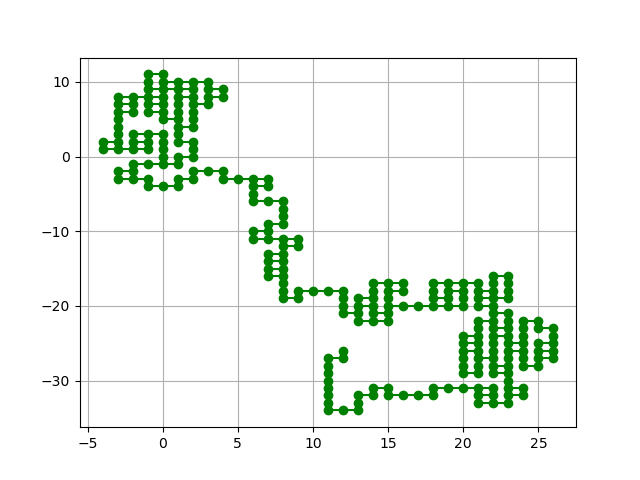

In [4]:
%matplotlib notebook
draw_conformation(structure)

In [7]:
from mc_lib.lattices import tabulate_neighbors
from cy_ising_cluster import simulate

In [8]:
neighb = tabulate_neighbors((10, 10, 1), 'sc')

In [9]:
simulate(neighb, 1.0, num_sweeps=200, verbose = 2)

beta =  1.0   T =  1.0
Conformation size = 100

----- sweep =  0 beta =  1.0
  ene =  -2.0  (naive)
      =  -2.0 +/- 0.0
  mag^2 =  1.0 +/- 0.0
  mag^4 =  1.0 +/- 0.0

Final:
  ene =  -1.9969999999999999  (naive)
  ene =  -1.9968750000000002 +/- 0.0011291589790550297
  mag^2 =  0.9983541666666668 +/- 0.0006135193558451641
  mag^4 =  0.9967893516666667 +/- 0.001193279676876034


(<mc_lib.observable.RealObservable at 0x1f8aa7b3440>,
 array([], dtype=object))

# Compare to exact enumeration

In [10]:
from exact_ising import calculate

### exact_ising.calculate calculates mean energy of the lattice by iterating over all states
#### small example with 2 by 2 lattice

In [11]:
neighb = tabulate_neighbors((2, 2, 1), 'sc')

In [12]:
neighb

array([[2, 1, 2],
       [2, 0, 3],
       [2, 0, 3],
       [2, 1, 2]])

In [16]:
beta = 0.1

In [17]:
calculate(neighb, beta, 2)

beta =  0.1   T =  10.0
[1 1 1 1]
ene = -4.0
prob weight = 1.4918246976412703
[-1  1  1  1]
ene = 0.0
prob weight = 1.0
[ 1 -1  1  1]
ene = 0.0
prob weight = 1.0
[-1 -1  1  1]
ene = 0.0
prob weight = 1.0
[ 1  1 -1  1]
ene = 0.0
prob weight = 1.0
[-1  1 -1  1]
ene = 0.0
prob weight = 1.0
[ 1 -1 -1  1]
ene = 4.0
prob weight = 0.6703200460356393
[-1 -1 -1  1]
ene = 0.0
prob weight = 1.0
[ 1  1  1 -1]
ene = 0.0
prob weight = 1.0
[-1  1  1 -1]
ene = 4.0
prob weight = 0.6703200460356393
[ 1 -1  1 -1]
ene = 0.0
prob weight = 1.0
[-1 -1  1 -1]
ene = 0.0
prob weight = 1.0
[ 1  1 -1 -1]
ene = 0.0
prob weight = 1.0
[-1  1 -1 -1]
ene = 0.0
prob weight = 1.0
[ 1 -1 -1 -1]
ene = 0.0
prob weight = 1.0
[-1 -1 -1 -1]
ene = -4.0
prob weight = 1.4918246976412703


(-0.1006481356805193, 0.30529043234275516, 0.213402819031191)

In [18]:
ene, mag2, mag4, _ = simulate(neighb, beta, num_sweeps=100000, verbose=1)

beta =  0.1   T =  10.0
Conformation size = 4

Final:
  ene =  -0.10167  (naive)
  ene =  -0.10167439778645833 +/- 0.0015527169555935591
  mag^2 =  0.30577596028645837 +/- 0.0009519871038458634
  mag^4 =  0.21414693196614584 +/- 0.0010039905704533531


### 4 by 4 lattice comparising

In [19]:
neighb = tabulate_neighbors((4, 4, 1), 'sc')
betas = [0.1, 0.3, 0.5, 0.7, 0.9]

In [21]:
ene_exact = []
mag2_exact = []
ene_cluster = []
mag2_cluster = []
for beta in betas:
    ene_1, mag2_1, _ = calculate(neighb, beta)
    ene_2, mag2_2, _, _ = simulate(neighb, beta, num_sweeps=10000)
    ene_exact.append(ene_1)
    ene_cluster.append(ene_2.mean)
    mag2_exact.append(mag2_1)
    mag2_cluster.append(mag2_2.mean)


In [24]:
print(ene_exact)
print(ene_cluster)
print('dif:', [ene_exact[i] - ene_cluster[i] for i in range(len(betas))])

print()

print(mag2_exact)
print(mag2_cluster)
print('dif:', [mag2_exact[i] - mag2_cluster[i] for i in range(len(betas))])

[-0.2057134663746855, -0.8440540736240817, -1.7553802887768237, -1.96349100500607, -1.9934838384161597]
[-0.20679995888157893, -0.8188990542763157, -1.7503597861842106, -1.9612715871710527, -1.9940892269736843]
dif: [0.0010864925068934383, -0.025155019347765983, -0.0050205025926131075, -0.0022194178350174454, 0.0006053885575245666]

[0.0978844920723228, 0.35764679694129325, 0.8689216816418985, 0.9819043955877641, 0.996876707187874]
[0.09403911389802633, 0.34614000822368424, 0.8666960063733553, 0.980852629009046, 0.9971972013774671]
dif: [0.0038453781742964765, 0.011506788717609018, 0.0022256752685432257, 0.001051766578718083, -0.0003204941895931235]


In [25]:
plt.figure()
plt.title('Energy')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$H$')
plt.errorbar(betas, ene_exact, fmt='-o', label='exact')
plt.errorbar(betas, ene_cluster, fmt='--o', label='cluster')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


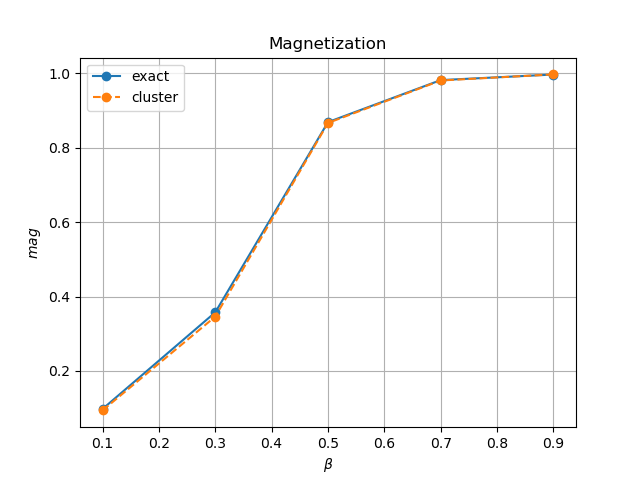

In [26]:
plt.figure()
plt.title('Magnetization')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$mag$')
plt.errorbar(betas, mag2_exact, fmt='-o', label='exact')
plt.errorbar(betas, mag2_cluster, fmt='--o', label='cluster')
plt.legend(loc='best')
plt.grid(True)
plt.show()